In [1]:
from datascience import *
from path_data_variable import *
import numpy as np

import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
births = Table.read_table(path_data + 'baby.csv')
births

Birth Weight | Gestational Days | Maternal Age | Maternal Height | Maternal Pregnancy Weight | Maternal Smoker
120          | 284              | 27           | 62              | 100                       | False
113          | 282              | 33           | 64              | 135                       | False
128          | 279              | 28           | 64              | 115                       | True
108          | 282              | 23           | 67              | 125                       | True
136          | 286              | 25           | 62              | 93                        | False
138          | 244              | 33           | 62              | 178                       | False
132          | 245              | 23           | 65              | 140                       | False
120          | 289              | 25           | 62              | 125                       | False
143          | 299              | 30           | 66              | 136                       | True
140          | 351              | 27           | 68              | 120                       | False
... (1164 rows omitted)

In [3]:
smoking_and_birthweight = births.select('Maternal Smoker', 'Birth Weight')

In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker | count
False           | 715
True            | 459

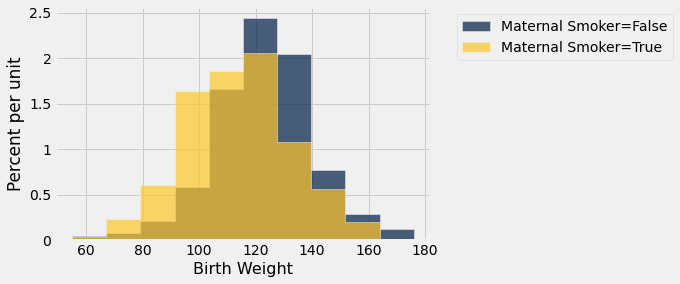

In [5]:
smoking_and_birthweight.hist('Birth Weight', group = 'Maternal Smoker')

In [6]:
means_table = smoking_and_birthweight.group('Maternal Smoker', np.average)
means_table

Maternal Smoker | Birth Weight average
False           | 123.085
True            | 113.819

In [7]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

-9.266142572024918

In [15]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean birth weights of the two groups"""
    reduced = table.select('Birth Weight', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [16]:
difference_of_means(births, 'Maternal Smoker')

-9.266142572024918

In [10]:
smoking_and_birthweight

Maternal Smoker | Birth Weight
False           | 120
False           | 113
True            | 128
True            | 108
False           | 136
False           | 138
False           | 132
False           | 120
True            | 143
False           | 140
... (1164 rows omitted)

In [12]:
shuffled_labels = smoking_and_birthweight.sample(with_replacement = False).column(0)
original_and_shuffled = smoking_and_birthweight.with_column('Shuffled Label', shuffled_labels)

In [13]:
original_and_shuffled

Maternal Smoker | Birth Weight | Shuffled Label
False           | 120          | True
False           | 113          | False
True            | 128          | False
True            | 108          | True
False           | 136          | False
False           | 138          | False
False           | 132          | True
False           | 120          | False
True            | 143          | True
False           | 140          | False
... (1164 rows omitted)

In [14]:
shuffled_only = original_and_shuffled.select('Birth Weight','Shuffled Label')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label | Birth Weight average
False          | 119.277
True           | 119.752

In [17]:
difference_of_means(original_and_shuffled, 'Shuffled Label')

0.4747109100050153

In [18]:
difference_of_means(original_and_shuffled, 'Maternal Smoker')

-9.266142572024918

In [19]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean birthweights
    of babies of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of birth weights and shuffled labels
    shuffled_table = births.select('Birth Weight').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [27]:
one_simulated_difference_of_means()

-0.058299434770034964

In [29]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    differences = np.append(differences, new_difference)                               

Observed Difference: -9.266142572024918


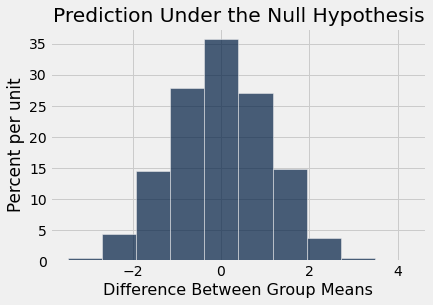

In [30]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

In [31]:
empirical_p = np.count_nonzero(differences <= observed_difference) / repetitions
empirical_p

0.0

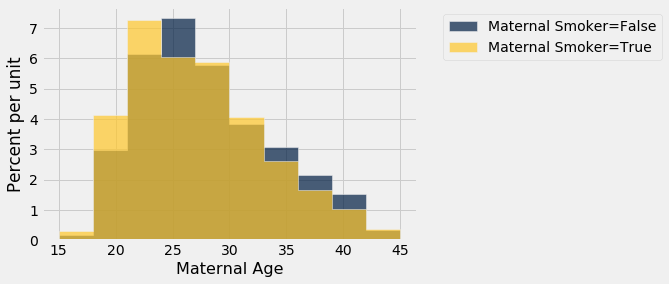

In [21]:
smoking_and_age = births.select('Maternal Smoker', 'Maternal Age')
smoking_and_age.hist('Maternal Age', group = 'Maternal Smoker')

In [32]:
def difference_of_means(table, group_label):
    """Takes: name of table,
    column label that indicates the group to which the row belongs
    Returns: Difference of mean ages of the two groups"""
    reduced = table.select('Maternal Age', group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [33]:
observed_age_difference = difference_of_means(births, 'Maternal Smoker')
observed_age_difference

-0.8076725017901509

In [34]:
def one_simulated_difference_of_means():
    """Returns: Difference between mean ages
    of smokers and non-smokers after shuffling labels"""
    
    # array of shuffled labels
    shuffled_labels = births.sample(with_replacement=False).column('Maternal Smoker')
    
    # table of ages and shuffled labels
    shuffled_table = births.select('Maternal Age').with_column(
        'Shuffled Label', shuffled_labels)
    
    return difference_of_means(shuffled_table, 'Shuffled Label')   

In [35]:
age_differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    age_differences = np.append(age_differences, new_difference)

Observed Difference: -0.8076725017901509


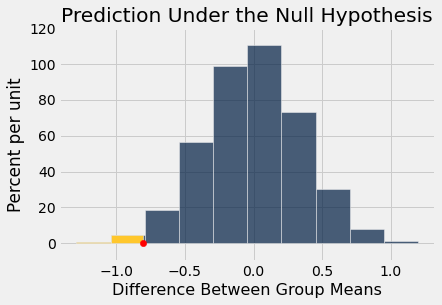

In [40]:
Table().with_column(
    'Difference Between Group Means', age_differences).hist(
    right_end = observed_age_difference)
# Plotting parameters; you can ignore the code below
plots.ylim(-0.1, 1.2)
plots.scatter(observed_age_difference, 0, color='red', s=40, zorder=3)
plots.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', observed_age_difference)

In [41]:
empirical_p = np.count_nonzero(age_differences <= observed_age_difference) / 5000
empirical_p

0.0108